In [86]:
from sklearn import datasets    # import 'datasets' from the sklearn library

from sklearn import tree                                               # Visualize the decision tree
from sklearn.svm import SVC                                            # Import Support Vector Machine Classifier
from sklearn.linear_model import LogisticRegression                    # Import Logistic Regression
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn.ensemble import RandomForestClassifier                    # Import random forest classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.linear_model import Perceptron                            # Import perceptron
from sklearn.neural_network import MLPClassifier                       # Import Multilayer perceptron Classifier
from sklearn.pipeline import Pipeline   #import 'Pipeline' from the sklearn library
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV   #import 'RepeatedStratifiedKFold' and "GridSearchCV" from the sklearn library

# More performance metrics
from sklearn import metrics #import 'metrics' from the sklearn library
from sklearn.metrics import accuracy_score  #import 'accuracy_score' from the sklearn library
from sklearn.metrics import precision_score #import 'precision_score' from the sklearn libary
from sklearn.metrics import recall_score #import 'recall_score' from the sklearn library
from sklearn.metrics import f1_score #import 'f1_score' from the sklearn library
from sklearn.metrics import roc_auc_score #import 'roc_auc_score' from the sklearn library

from collections import OrderedDict

import pandas as pd #import the pandas library and alias it to 'pd'
import numpy as np #import the numpy library and alias it to 'np'
import matplotlib.pyplot as plt #import the pyplot portion of the matplotlib library and alias it to 'plt'

1. Support Vector Machine

In [64]:
svm_para = {
    'svc__kernel':['linear','poly','sigmoid'], #define parameters for GridSearchCV to use
    }

svm_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("svc",  SVC(C = 0.1, kernel='linear', gamma='auto', probability=True)), # step 2, run the data through a SVM classifier
    ]) # formatting


In [65]:
df = pd.read_csv('obesity.csv') # import obesity.csv and load it as a dataframe into the variable 'df'

poss = df['NObeyesdad'].unique() # get all possible results before manipulating the data

cat_features = df.select_dtypes(include = "object").columns # get columns that contain object values

#Label Encoding for object to numeric conversion

le = LabelEncoder() # load 'labelencoder' function to variable 'le'

for col in cat_features: # for each column in 'cat_features'
    df[col] = le.fit_transform(df[col].astype(str)) # change column value for the original dataset to a label in string format

In [66]:
# Create class(y) and features(X) from the dataset

y = df['NObeyesdad'] # Set y value to the NObeyesdad column
X = df.drop('NObeyesdad',axis=1) # Set x value to everything EXCEPT the NObeyesdad column

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42) # randomly split the dataset up into 80% training and 20% test using a seed of '42'

#svm = SVC() #this isn't used
svm_gs = GridSearchCV(estimator=svm_clf, param_grid=svm_para, scoring='accuracy', return_train_score=True) # using the svm_clf model above, calculate with parameters from svm_para give the highest accuracy when added

svm_gs.fit(X_train, y_train) # train the pipeline created earlier to fit the x_train data to the y_train data
y_pred = svm_gs.predict(X_test) # use the model to predict y values based on the X_test dataset

svm_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix showing the accuracy of the predictions according to the test data
print(classification_report(y_test, y_pred)) # print a classification report showing the accuracy of the predictions according to the test data

[[56  0  0  0  0  0  0]
 [11 40  0  0  0  7  4]
 [ 0  0 71  5  0  0  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 44  7]
 [ 0  0  1  0  0  6 43]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.89      0.65      0.75        62
           2       0.97      0.91      0.94        78
           3       0.92      0.98      0.95        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.77      0.86      0.81        50

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.89      0.88      0.88       423



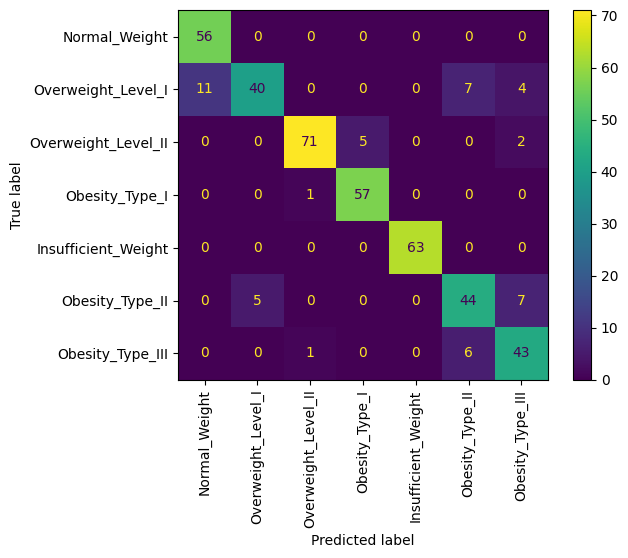

In [68]:
#print(df['NObeyesdad'].unique()) #debugging line - print all unique values in this column
cfm = confusion_matrix(y_test, y_pred) # create the same confusion matrix as before but save it into a variable
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = poss) # define parameters for a plot

cm_display.plot() # display a prettier confusion matrix
plt.xticks(rotation = 90) # rotate the x axis labels so that they're legible
plt.show() # show the output

In [69]:
svm_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, gamma='auto', kernel='linear', probability=True))])

2. Perceptron

In [70]:
pct_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("pct",  Perceptron()), # step 2, run the data through a perceptron classifier
    ]) # formatting


pct_para = {    # define parameters for the perceptron grid search to use
    'pct__eta0':[0.0001,0.001,0.01,0.1,1] # test these values of eta0 inside of the 'pct' portion of the 'pct_clf' pipeline
}   #formatting

pct_gs = GridSearchCV(estimator=pct_clf, param_grid=pct_para, scoring='accuracy', return_train_score=True) # test the values in pct_para with the pct_clf pipeline and pick the best one

pct_gs.fit(X_train, y_train) # train the pipeline created earlier to fit the x_train data to the y_train data
y_pred = pct_gs.predict(X_test) # use the model to predict y values based on the X_test dataset

pct_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix showing the accuracy of the predictions according to the test data
print(classification_report(y_test, y_pred)) # print a classification report showing the accuracy of the predictions according to the test data

[[49  7  0  0  0  0  0]
 [20 24  3  0  0  7  8]
 [ 0  2 47  3  3  8 15]
 [ 0  0  4 52  0  0  2]
 [ 0  0  0  0 63  0  0]
 [ 0 17  5  0  0 20 14]
 [ 0  8 18  0  0  7 17]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.41      0.39      0.40        62
           2       0.61      0.60      0.61        78
           3       0.95      0.90      0.92        58
           4       0.95      1.00      0.98        63
           5       0.48      0.36      0.41        56
           6       0.30      0.34      0.32        50

    accuracy                           0.64       423
   macro avg       0.63      0.64      0.63       423
weighted avg       0.64      0.64      0.64       423



In [71]:
pct_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pct', Perceptron(eta0=1))])

3. Multi-layer Perceptron

In [72]:
mlp_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("mlp",  MLPClassifier()), # step 2, run the data through a perceptron classifier
    ]) # formatting


mlp_para = {    # define parameters for the perceptron grid search to use
    'mlp__learning_rate':['standard','invscaling','adaptive'], # test these values of eta0 inside of the 'mlp' portion of the 'mlp_clf' pipeline
    'mlp__max_iter':[100,200,500,1000], # set a test range of values for max_iter
    'mlp__hidden_layer_sizes':[(256,128,64),(128,64,32),(64,32,16),(32,16,8)], # set a range of sizes for hidden_layer_sizes
    'mlp__activation':['identity', 'logistic', 'tanh', 'relu'] # set a test range of values for activation
}   #formatting

mlp_gs = GridSearchCV(estimator=mlp_clf, param_grid=mlp_para, scoring='accuracy', return_train_score=True, n_jobs=-1) # test the values in mlp_para with the mlp_clf pipeline and pick the best one

mlp_gs.fit(X_train, y_train) # train the pipeline created earlier to fit the x_train data to the y_train data
y_pred = mlp_gs.predict(X_test) # use the model to predict y values based on the X_test dataset


mlp_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix showing the accuracy of the predictions according to the test data
print(classification_report(y_test, y_pred)) # print a classification report showing the accuracy of the predictions according to the test data


c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Qthooloo\AppData\Local\Programs\Python\P

[[54  2  0  0  0  0  0]
 [ 4 55  0  0  0  3  0]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 49  2]
 [ 0  0  0  0  0  1 49]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.89      0.89      0.89        62
           2       1.00      0.99      0.99        78
           3       0.98      1.00      0.99        58
           4       1.00      1.00      1.00        63
           5       0.92      0.88      0.90        56
           6       0.96      0.98      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [73]:
mlp_gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic',
                               hidden_layer_sizes=(256, 128, 64),
                               learning_rate='adaptive', max_iter=500))])

4a. Logistic Regression

[[56  0  0  0  0  0  0]
 [11 39  0  0  0  8  4]
 [ 0  0 70  7  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 44  8]
 [ 0  0  3  0  0  5 42]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



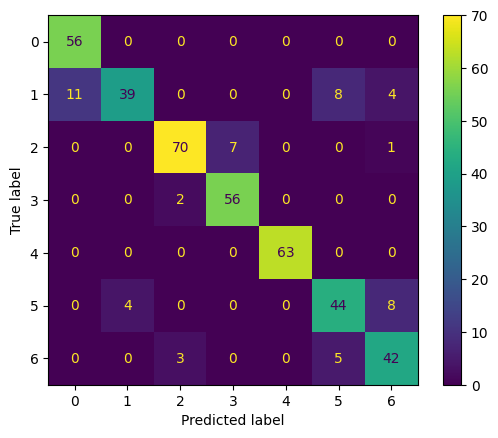

In [74]:
# scale numeric columns and perform the logistic regression

log_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("log",  LogisticRegression(max_iter=10000)), # step 2, run the data through a logistic regression
    ]) # formatting

log_clf.fit(X_train, y_train) # train the logistic regression model
y_pred = log_clf.predict(X_test) # test the model against test data


log_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix displaying the training results
print(classification_report(y_test, y_pred)) # print a report showing more details on the training results

cfm = confusion_matrix(y_test, y_pred) # print a confusion matrix based on the results from testing the model

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm) # load the confusion matrix from above into a function that creates a graphic
cm_display.plot() # plot the graphic
plt.show() # show the plot


4b. Decision Tree

[[54  2  0  0  0  0  0]
 [ 4 54  0  0  0  4  0]
 [ 0  1 71  4  0  0  2]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 51  0]
 [ 0  0  1  0  0  2 47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.87      0.87      0.87        62
           2       0.95      0.91      0.93        78
           3       0.93      0.95      0.94        58
           4       1.00      1.00      1.00        63
           5       0.89      0.91      0.90        56
           6       0.96      0.94      0.95        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



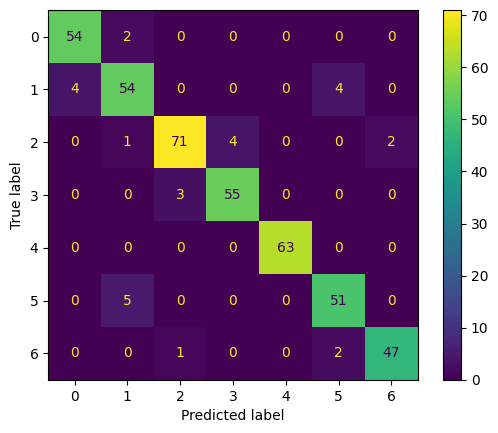

In [75]:
# scale numeric columns and perform the logistic regression

tree_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("tree",  DecisionTreeClassifier()), # step 2, run the data through a decision tree classifier
    ]) # formatting

tree_clf.fit(X_train, y_train) # train the decision tree model
y_pred = tree_clf.predict(X_test) # test the model against test data


tree_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix displaying the training results
print(classification_report(y_test, y_pred)) # print a report showing more details on the training results

cfm = confusion_matrix(y_test, y_pred) # print a confusion matrix based on the results from testing the model

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm) # load the confusion matrix from above into a function that creates a graphic
cm_display.plot() # plot the graphic
plt.show() # show the plot

4c. Random Forest

[[54  2  0  0  0  0  0]
 [ 0 57  0  0  0  5  0]
 [ 0  0 76  2  0  0  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 50  1]
 [ 0  0  0  0  0  2 48]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.89      0.92      0.90        62
           2       0.97      0.97      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423



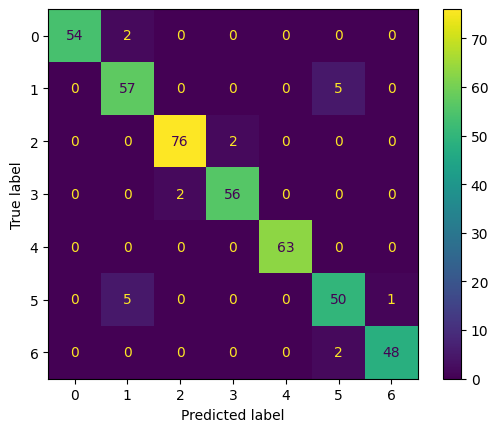

In [76]:
# scale numeric columns and perform the logistic regression

rf_clf = Pipeline([ # create a pipeline
        ("scaler", StandardScaler()), # step 1, run the data through standardscaler
        ("rf",  RandomForestClassifier()), # step 2, run the data through a random forest classifier
    ]) # formatting

rf_clf.fit(X_train, y_train) # train the random forest model
y_pred = rf_clf.predict(X_test) # test the model against test data


rf_acc = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred)) # print a confusion matrix displaying the training results
print(classification_report(y_test, y_pred)) # print a report showing more details on the training results

cfm = confusion_matrix(y_test, y_pred) # print a confusion matrix based on the results from testing the model

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm) # load the confusion matrix from above into a function that creates a graphic
cm_display.plot() # plot the graphic
plt.show() # show the plot

5. Comparison

In [77]:
#removed because this doesn't work with the dataset

# ROC AUC
#accuracy_score(svm_gs)
#y_hat_pct = pct_gs.predict_proba(X_test)
#y_hat_mlp = mlp_gs.predict_proba(X_test)
#y_hat_log = log_clf.predict_proba(X_test)
#y_hat_tree = tree_clf.predict_proba(X_test)
#y_hat_rf = rf_clf.predict_proba(X_test)



#model_accuracy = {}
#
#auc = roc_auc_score(y_test, y_hat_svm[:,1])
#print('Support Vector Machine - ROC AUC: %f' % auc)
#model_accuracy.update({"SVM": auc})
#
#auc = roc_auc_score(y_test, y_hat_pct[:,1])
#print('Perceptron - ROC AUC: %f' % auc)
#model_accuracy.update({"Perceptron": auc})
#
#auc = roc_auc_score(y_test, y_hat_mlp[:,1])
#print('Multi-Layer Perceptron - ROC AUC: %f' % auc)
#model_accuracy.update({"Multi-Layer Perceptron": auc})
#
#auc = roc_auc_score(y_test, y_hat_log[:,1])
#print('Logistic Regression - ROC AUC: %f' % auc)
#model_accuracy.update({"Logistic Regression": auc})
#
#auc = roc_auc_score(y_test, y_hat_tree[:,1])
#print('Decision Tree - ROC AUC: %f' % auc)
#model_accuracy.update({"Decision tree": auc})
#
#auc = roc_auc_score(y_test, y_hat_rf[:,1])
#print('Random Forest - ROC AUC: %f' % auc)
#model_accuracy.update({"Random Forest": auc})
#
#fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_hat_svm[:,1])
#fpr_pct, tpr_pct, _ = metrics.roc_curve(y_test, y_hat_pct[:,1])
#fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_hat_mlp[:,1])
#fpr_log, tpr_log, _ = metrics.roc_curve(y_test, y_hat_log[:,1])
#fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, y_hat_tree[:,1])
#fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_hat_rf[:,1])
#
#plt.clf()
#plt.plot(fpr_svm, tpr_svm, label="Support Vector Machine")
#plt.plot(fpr_pct, tpr_pct, label="Perceptron")
#plt.plot(fpr_mlp, tpr_mlp, label="Multi-Layer Perceptron")
#plt.plot(fpr_log, tpr_log, label="Logistic Regression")
#plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
#plt.plot(fpr_rf, tpr_rf, label="Random Forest")
#plt.xlabel('FPR')
#plt.ylabel('TPR')
#plt.title('ROC curve')
#plt.legend()
#plt.show()
#
#model_type = list(model_accuracy.keys())
#model_acc = list(model_accuracy.values())
#
#plt.bar(range(len(model_accuracy)), model_acc, tick_label=model_type)
#plt.ylim(.74, .79)
#plt.xticks(rotation = 90)
#plt.show()


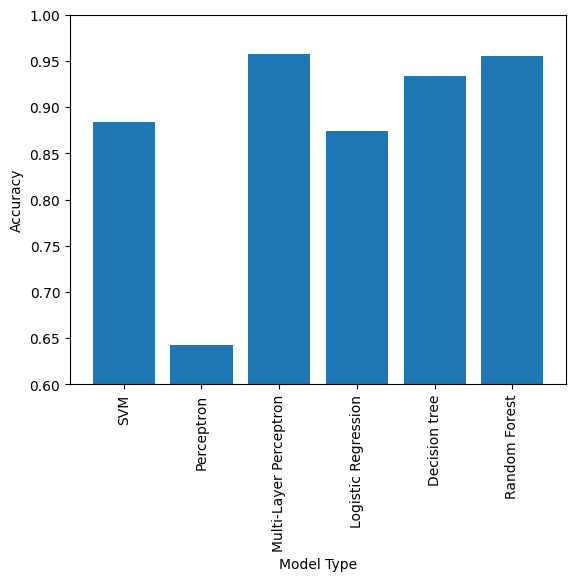

{'SVM': 0.8841607565011821,
 'Perceptron': 0.6430260047281324,
 'Multi-Layer Perceptron': 0.9574468085106383,
 'Logistic Regression': 0.8747044917257684,
 'Decision tree': 0.933806146572104,
 'Random Forest': 0.9550827423167849}

In [95]:
model_accuracy = { # create a dictionary to store scores in
    "SVM": svm_acc, # label and store the score for svm
    "Perceptron": pct_acc, # label and store the score for perceptron
    "Multi-Layer Perceptron": mlp_acc, # label and store the score for multi-layer perceptron
    "Logistic Regression": log_acc, # label and store the score for logistic regression
    "Decision tree": tree_acc, # label and store the score for decision tree
    "Random Forest": rf_acc # label and store the score for random forest
}

model_type = list(model_accuracy.keys()) # put keys from the dict into a list for easier plotting
model_acc = list(model_accuracy.values()) # put values from the dict into a list for easier plotting

plt.bar(range(len(model_accuracy)), model_acc, tick_label=model_type) # create a bar chart using type as the x label and accuracy as the y values
plt.ylim(.6, 1) # scale the y values displayed for clarity
plt.xticks(rotation = 90) # rotate the x labels for readability
plt.xlabel('Model Type') # label the x axis
plt.ylabel('Accuracy') # label the y axis
plt.show() # show the plot

model_accuracy

You can see above that MLP had the highest accuracy, though only barely above Random Forest. Most of these models are fairly accurate, aside from the single layer perceptron.